In [2]:
import pylab as plt 
import pandas as pd
import numpy as np
from tqdm import tqdm

In [3]:
from plotting_utils import add_earth

In [4]:
def plot(df_sub, fname=None):
    plt.figure(figsize=(10, 5))
    plt.subplot(121)
    cmap = plt.get_cmap('viridis')
    for i in range(50, 500, 50):
        plt.scatter(df_sub[f'x{i}'], df_sub[f'z{i}'], c=cmap(np.linspace(0, 1, len(df_sub.index))))

    plt.xlabel('X (SM)')
    plt.ylabel('Z (SM)')
    plt.axhline(0, color='k')
    plt.axvline(0, color='k')
    plt.xlim(-1, 7)
    plt.ylim(-3, 3)
    add_earth()
    plt.gca().set_aspect("equal")
        
    plt.subplot(122)
    cmap = plt.get_cmap('viridis')
    for i in range(50, 500, 50):
        plt.scatter(df_sub[f'x{i}'], df_sub[f'y{i}'], c=cmap(np.linspace(0, 1, len(df_sub.index))))

    plt.xlabel('X (SM)')
    plt.ylabel('Y (SM)')
    plt.xlim(-1, 7)
    plt.ylim(-7, 7)
    plt.axhline(0, color='k')
    plt.axvline(0, color='k')
    add_earth()
    plt.gca().set_aspect("equal")
    
    if fname:
        plt.savefig(fname)
        plt.close()


In [54]:
df = pd.read_csv('data/test_dipole.csv')
print(len(df.index))

22589


In [55]:
df.head()

,Unnamed: 0,t0,x0,y0,z0,vpar0,B0,W0,h0,t50,...,W400,h400,t450,x450,y450,z450,vpar450,B450,W450,h450
0,0,0.100000,3.0,0.000004,0.000021,0.000213,-0.01388,5.751817e-07,0.162060,0.100000,...,6.609701e-08,0.200540,0.100000,7.5,0.000004,0.000021,0.000213,-0.000888,5.796985e-08,0.203967
1,1,0.262060,3.0,0.000011,0.000056,0.000213,-0.01388,5.751816e-07,0.232773,0.268566,...,6.609701e-08,0.337948,0.303967,7.5,0.000011,0.000065,0.000213,-0.000888,5.796985e-08,0.348122
2,2,0.494833,3.0,0.000021,0.000105,0.000213,-0.01388,5.751815e-07,0.305404,0.517937,...,6.609700e-08,0.499847,0.652089,7.5,0.000024,0.000139,0.000213,-0.000888,5.796985e-08,0.519827
3,3,0.800236,3.0,0.000034,0.000170,0.000213,-0.01388,5.751813e-07,0.374395,0.852442,...,6.609700e-08,0.670390,1.171916,7.5,0.000043,0.000249,0.000213,-0.000888,5.796984e-08,0.702190
4,4,1.174631,3.0,0.000051,0.000249,0.000213,-0.01388,5.751811e-07,0.436186,1.269380,...,6.609699e-08,0.835498,1.874106,7.5,0.000068,0.000399,0.000213,-0.000888,5.796984e-08,0.879835


Text(0.5, 0, 'Time (seconds)')

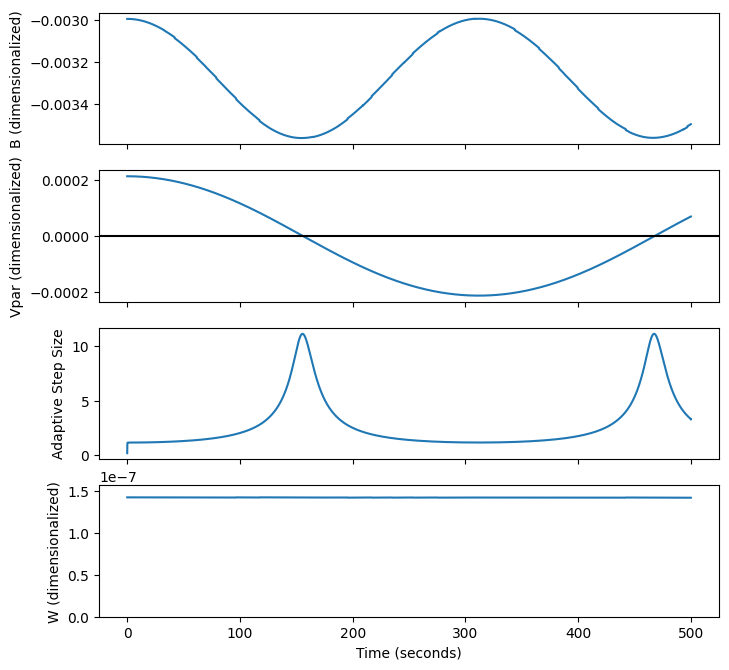

In [72]:
t = (df['t200'].values / sf).to(units.s).value


fig, axes = plt.subplots(4, 1,sharex=True, figsize=(8, 8), dpi=100)
axes[0].plot(t, df['B200'], '-')
axes[0].set_ylabel('B (dimensionalized)')
axes[1].plot(t, df['vpar200'], '-')
axes[1].set_ylabel('Vpar (dimensionalized)')
axes[1].axhline(0, color='k')
axes[2].plot(t, df['h200'], '-')
axes[2].set_ylabel('Adaptive Step Size')
axes[3].plot(t, df['W200'], '-')
axes[3].set_ylabel('W (dimensionalized)')
axes[3].set_ylim(0, df['W200'].max() * 1.1)
axes[3].set_xlabel('Time (seconds)')

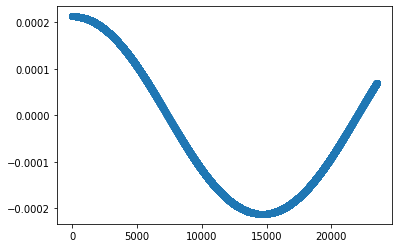

In [57]:
plt

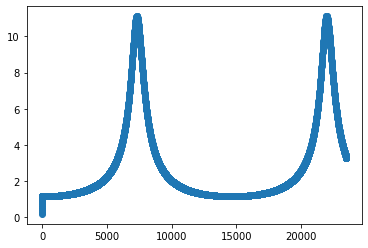

In [58]:
plt

(0.0, 4.0756771710892533e-07)

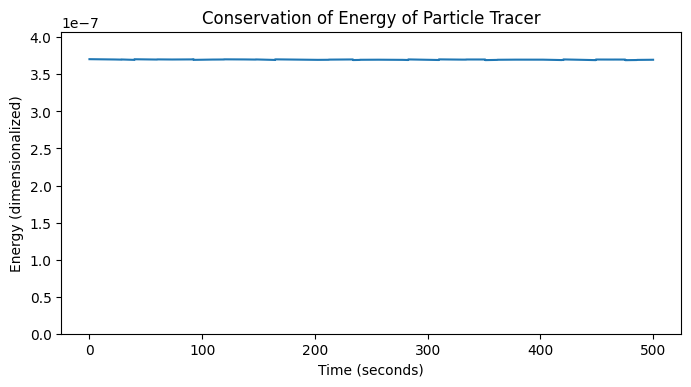

In [52]:
from astropy.constants import R_earth, m_e, c
from astropy import units

B_units = units.s / units.km
M_units = units.km / units.s
sf = c / R_earth
t = (df['t50'].values / sf).to(units.s).value
W = df['W50'].values 

plt.figure(figsize=(8, 4), dpi=100, facecolor='white')
plt.plot(t, df['W50'], '-')
plt.ylabel('Energy (dimensionalized)')
plt.xlabel('Time (seconds)')
plt.title('Conservation of Energy of Particle Tracer')
plt.ylim(0, W.max()*1.1)

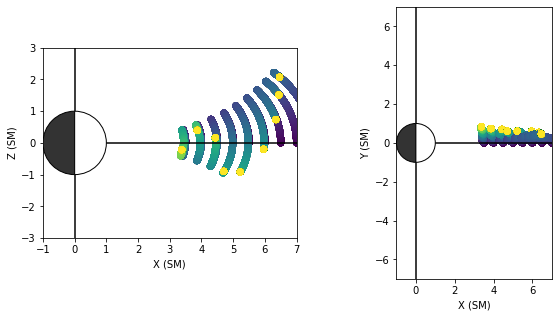

In [53]:
plot(df)

In [9]:
import joblib
tasks = []

for i in range(len(df.index)):
    tasks.append(joblib.delayed(plot)(df.iloc[i:i+100], 'plots/%04d.png' % i))
    
print(f'Tasks: {len(tasks)}')

joblib.Parallel(n_jobs=-1, verbose=1)(tasks)

Tasks: 5000


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   25.5s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   56.3s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed: 10.5min
[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed: 10.5min finished


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,